<a href="https://colab.research.google.com/github/jceresearch/paat/blob/master/charts_cheatsheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Charts gallery  

This is a compendium of various charting techniques using matplotlib.  
I am not using further libraries to keep it basic (seaborn etc are covered elsewhere).  



In [2]:
#!Python3
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
from scipy.stats import norm
import math
import plotly
import plotly.graph_objects as go
import pandas as pd
import random
import math
import numpy as np
from scipy.stats import loguniform
import datetime
from scipy.stats import poisson
from datetime import datetime, timedelta
print(datetime.now())
#plt.xkcd() # remove this to disable the handwritten look and feel.

2021-07-01 06:28:25.076588


In [3]:
df=pd.read_excel('./test_data/data.xlsx')
print(df.shape)
df.info()

(21514, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21514 entries, 0 to 21513
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         21514 non-null  int64         
 1   id                 21514 non-null  object        
 2   prio               21514 non-null  int64         
 3   date_created       21514 non-null  datetime64[ns]
 4   date_resolved      18621 non-null  datetime64[ns]
 5   resolution_days    21514 non-null  float64       
 6   resolution_hs      21514 non-null  float64       
 7   inc_type           21514 non-null  object        
 8   is_in_report       21514 non-null  bool          
 9   is_child           21514 non-null  bool          
 10  is_long_runner     21514 non-null  bool          
 11  is_low_runner      21514 non-null  bool          
 12  resolution_bucket  21514 non-null  object        
 13  outcome            21514 non-null  object        

In [4]:
# this is for the histograms
df['resolution_days_round']=df['resolution_days'].apply(lambda x: round(x/10,0))
# you need text values for the stacked bar chart for some reason 
df['made_sla_yn']=df["made_sla"].apply(lambda x: "Yes" if x else "No")

We are going to plot based on the yyyymm that comes in the data (If you dont have it it should be easy to create, see the companion notebook for how that data was generated).  
In this case we have two plots overlaid: the volume and the percentage of meeting the SLA  
So we start by summarising to the right granularity

In [5]:
df['yyyymm']=df.apply(lambda r: str(r['date_created'].year)+'{:02d}'.format(r['date_created'].month) ,axis=1)
dfg1=df[['yyyymm','id']].groupby('yyyymm').agg(len)
dfg1.reset_index(inplace=True)
dfg2= df.groupby('yyyymm')['made_sla'].apply(lambda x: round(np.sum(x)/len(x),2))
dfg2= dfg2.reset_index()


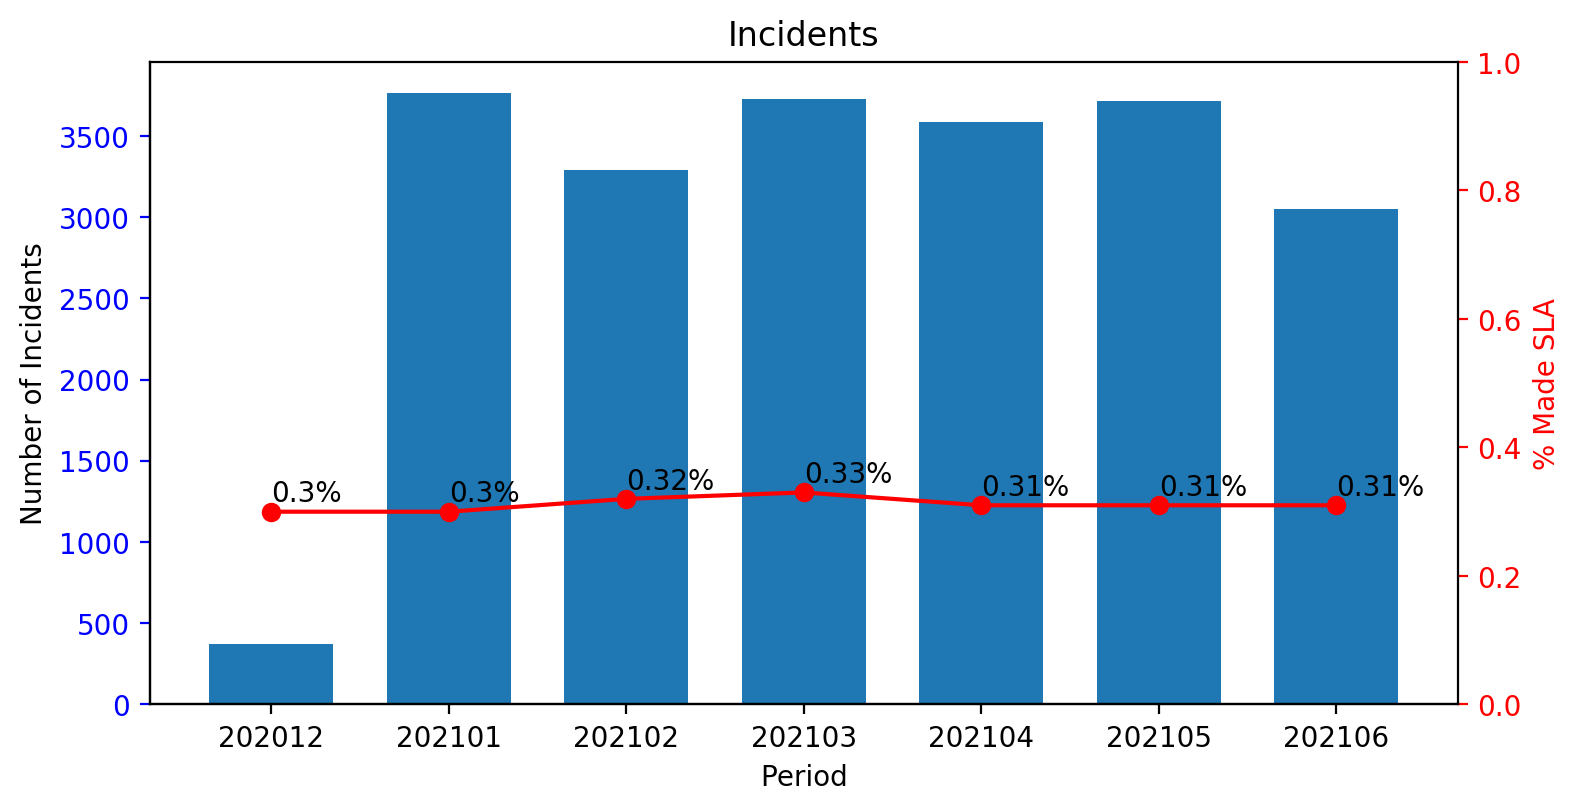

In [6]:

x_values = dfg1['yyyymm'] #will apply for both charts as they share same x axis
y_values=dfg1['id']
y2_values=s2=dfg2['made_sla']

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x_values,y_values, width=.7, align='center')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
#ax.set_xlim([min(x_values)-1,max(x_values)+1])
#ax.set_ylim([0, max(y_values)+1])
ax.xaxis.set_major_locator(ticker.FixedLocator(x_values))
ax.set_xticklabels(x_values)
ax.set_xlabel('Period')
ax.set_ylabel('Number of Incidents')
ax.tick_params('y', colors='b')

#plt.yticks([]) # this is to customise the y axis, google options
ax2=ax.twinx()
ax2.plot(x_values,y2_values, linestyle='-', marker='o',color='r')
ax2.set_ylim([0,1])# or you could use max(y_values) to make it dynamic, for example to add one more to the max to give more room, because we are plotting percentages it is odd to have 120% so I didnt go there
ax2.set_ylabel('% Made SLA', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
for i, v in enumerate(y2_values):
    ax2.annotate(str(v)+"%", (x_values[i], y2_values[i]), 
    xytext=(0, 10), 
    textcoords='offset pixels',  
    )

plt.title("Incidents")
plt.show()

Now we are going to go for a line chart and play with the annotations  


Max data point 1    3767
Name: id, dtype: int64


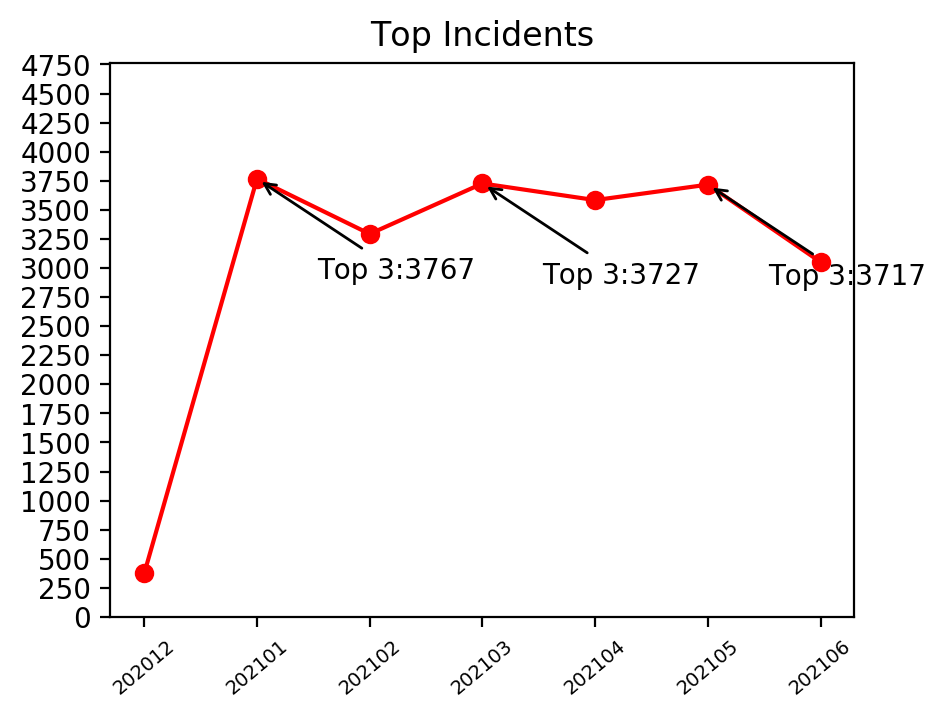

In [7]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_values = dfg1['yyyymm']
y_values=dfg1['id']
#this is a small embedded function to find the value given a position in the list
def get_key_point(i):
    return (x_values[i],y_values[i])


#this gets the max value or values if there are more than one, could be alternative
# for now we print it for info, you can replace the top3_list by the max_list and presto
maxy=np.max(y_values)
max_list= np.where(y_values==maxy)
print("Max data point", y_values[max_list[0]])

top3_list=y_values.argsort()[-3:][::-1]

plt.xticks(range(len(x_values)),x_values, rotation=40, size='x-small')       
plt.yticks(np.arange(0,max(y_values)+1000,step=250))
ax.set_ylim(0,max(y_values)+1000)
ax.plot(x_values, y_values,linestyle='-', marker='o',color='r')
for m in top3_list:
    ax.annotate('Top 3:'+str(get_key_point(m)[1]), xy=get_key_point(m), arrowprops=dict(arrowstyle='->'), xytext=(60,-100),textcoords='offset pixels')
plt.title('Top Incidents')
plt.show()

In [8]:
dfg3=df[['resolution_days_round','prio','id']].groupby(['resolution_days_round','prio']).agg(len)
dfg3.reset_index(inplace=True)

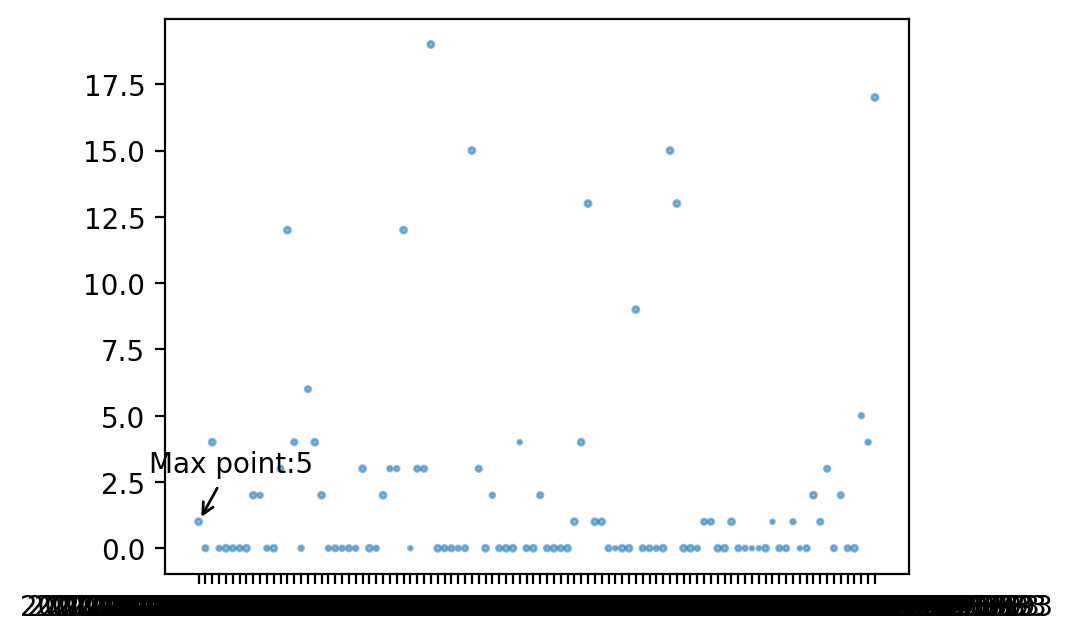

In [14]:
x = df[df.yyyymm=='202104'][0:100]['date_created'].astype(str).to_list()
y = df[df.yyyymm=='202104'][0:100]['resolution_days_round'].to_list()
area = df[df.yyyymm=='202104']['prio'].astype(int)
plt.scatter(x, y, s=area, alpha=0.5)

maxa=np.max(area)
maxi=list(area).index(maxa)
plt.annotate('Max point:'+str(round(maxa,2)), xy=(x[maxi],y[maxi]), arrowprops=dict(arrowstyle='->'), xytext=(-50,50),textcoords='offset pixels')


plt.show()

In [10]:
dfg4=df[['resolution_days_round','id']].groupby(['resolution_days_round']).agg(len)
dfg4.reset_index(inplace=True)
dfg4.head()

resolution_days_round     id
0                    0.0  10908
1                    1.0   3481
2                    2.0   1505
3                    3.0   1058
4                    4.0    748

In [45]:
df[df.resolution_days_round==0]

Unnamed: 0         id  prio            date_created  \
4               4  INC000005     2 2020-12-28 12:29:45.593   
5               5  INC000006     5 2020-12-28 12:44:45.593   
8               8  INC000009     2 2020-12-28 13:34:45.593   
10             10  INC000011     3 2020-12-28 14:14:45.593   
11             11  INC000012     5 2020-12-28 14:44:45.593   
...           ...        ...   ...                     ...   
21502       21502  INC021503     4 2021-06-26 07:14:45.592   
21504       21504  INC021505     5 2021-06-26 07:31:54.164   
21507       21507  INC021508     3 2021-06-26 07:57:37.021   
21511       21511  INC021512     3 2021-06-26 09:34:45.592   
21513       21513  INC021514     4 2021-06-26 10:14:45.592   

                date_resolved  resolution_days  resolution_hs  inc_type  \
4     2020-12-29 06:40:05.748         0.757178      18.172265  incident   
5     2021-01-01 12:53:55.102         4.006360      96.152641  incident   
8     2020-12-29 07:00:26.462         0.726167      17.428019  incident   
10    2020-12-28 23:19:48.592         0.378507       9.084166  incident   
11    2020-12-29 02:59:43.663         0.510394      12.249464   inc req   
...                       ...              ...            ...       ...   
21502                     NaT         0.281303       6.751280     alert   
21504                     NaT         4.073823      97.771764     alert   
21507                     NaT         2.122889      50.949346  incident   
21511                     NaT         0.099935       2.398431   inc req   
21513                     NaT         0.214348       5.144352       req   

       is_in_report  is_child  is_long_runner  is_low_runner  \
4              True     False           False          False   
5              True      True           False          False   
8              True     False           False          False   
10             True     False           False          False   
11            False     False           False          False   
...             ...       ...             ...            ...   
21502          True     False           False          False   
21504          True     False           False          False   
21507          True     False           False          False   
21511         False     False           False          False   
21513          True     False           False          False   

      resolution_bucket  outcome  made_sla  yyyymm  resolution_days_round  \
4            a. <5 days  partial     False  202012                    0.0   
5            a. <5 days    fully     False  202012                    0.0   
8            a. <5 days  partial     False  202012                    0.0   
10           a. <5 days    fully      True  202012                    0.0   
11           a. <5 days    fully      True  202012                    0.0   
...                 ...      ...       ...     ...                    ...   
21502        a. <5 days     open      True  202106                    0.0   
21504        a. <5 days     open     False  202106                    0.0   
21507        a. <5 days     open     False  202106                    0.0   
21511        a. <5 days     open      True  202106                    0.0   
21513        a. <5 days     open      True  202106                    0.0   

      made_sla_yn  
4              No  
5              No  
8              No  
10            Yes  
11            Yes  
...           ...  
21502         Yes  
21504          No  
21507          No  
21511         Yes  
21513         Yes  

[10908 rows x 18 columns]

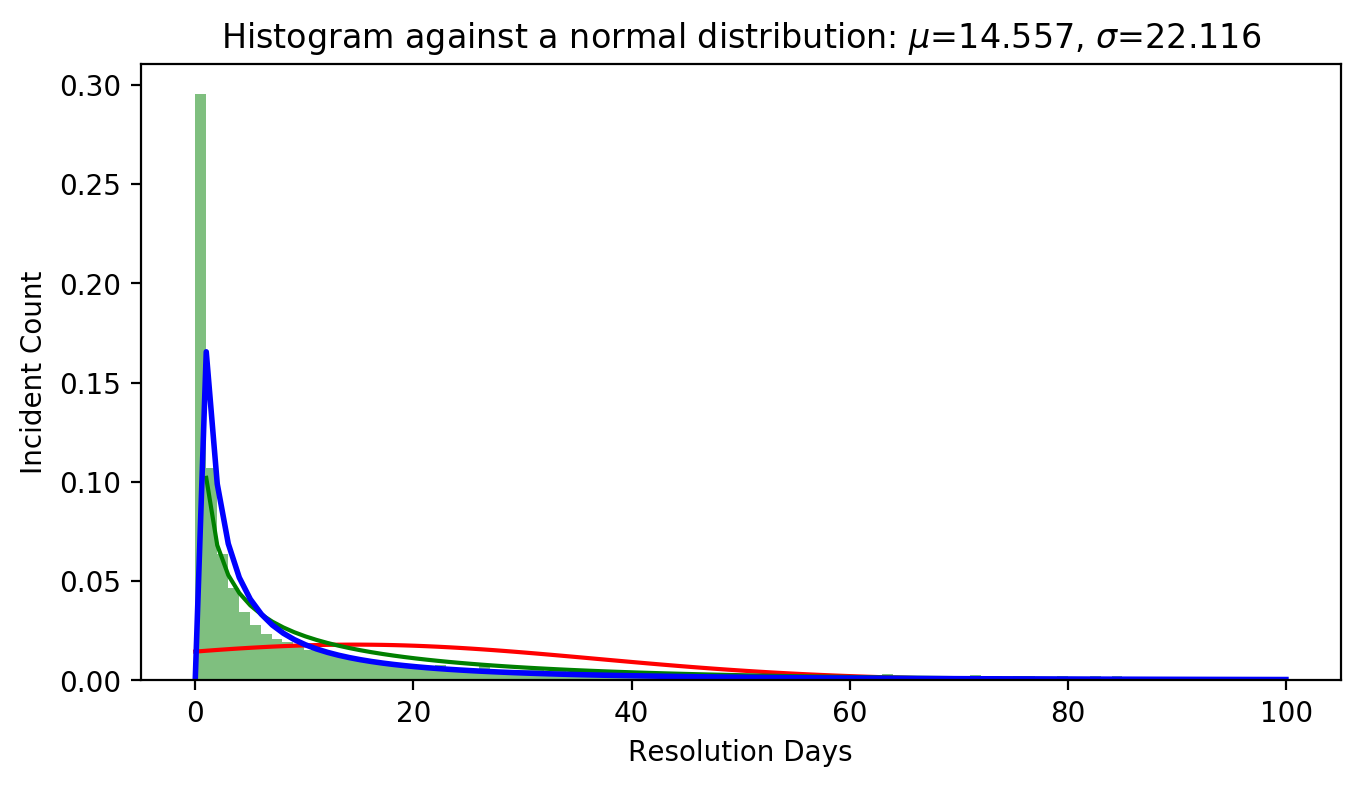

In [65]:
from scipy.stats import norm, gamma, lognorm
import statistics

# coding: utf-8
'''
Demo of the histogram (hist) function with a few features.
In addition to the basic histogram, this demo shows a few optional features:
* Setting the number of data bins
* The ``density`` flag, which normalizes bin heights so that the integral of the histogram is 1. The resulting histogram is a probability density.
* Setting the face color of the bars
* Setting the opacity (alpha value).
'''

fig = plt.figure(figsize=(8,4))
# sample data
s = list(df['resolution_days'])
s=[i for i in s if i <= 100]
N= len(s)
mu=np.mean(s)
sigma=np.std(s)
binwidth=1
bins= np.arange(round(min(s),0), round(max(s),0) +binwidth)

# the histogram of the data
n, bins, patches = plt.hist(s, bins, binwidth, density=True, facecolor='green', alpha=0.5)

x = np.linspace(0, max(s), 100) 
if True:
    # add a 'best fit' line
    mu_norm, sigma_norm = norm.fit (s) # mean and standard deviation
    y = norm.pdf(x,mu,sigma)
    plt.plot(x, y, color='r')
if True:
    #The Gamma fitting below doesnt work and I dont know why yet
    param = gamma.fit(s, floc=0)
    y = gamma.pdf(x, *param)
    plt.plot(x, y, color='green')
if True:
    fitting_params_lognormal = lognorm.fit(s, floc=0)
    lognorm_dist_fitted = lognorm(*fitting_params_lognormal)
    plt.plot(x,lognorm_dist_fitted.pdf(x) ,linewidth=2, color='blue' )  

plt.xlabel('Resolution Days')
plt.ylabel('Incident Count')
plt.title(r'Histogram against a normal distribution: $\mu$=' + str(round(mu,3)) +r', $\sigma$='+str(round(sigma,3)))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
dfg5 = df.groupby(['yyyymm', 'made_sla_yn'])['id'].count().unstack('made_sla_yn').fillna(0)
df_total=df[['yyyymm','id']].groupby('yyyymm').agg(len)
df_perc = dfg5.div(df_total['id'], 0)*100
y1=df_perc.iloc[:,0]
y2=df_perc.iloc[:,1]
ax = df_perc.plot(kind="bar", stacked=True,width=.8)
ax.figure.set_size_inches(10,5)
for j, c in enumerate(ax.containers):
    for i, p in enumerate(c.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        perc=str(round(int(height)))+"%"
        ax.annotate(perc, (x + width/2, y + height*1.02-6), ha='center')
ax.legend(bbox_to_anchor=(1.2, 1.05))



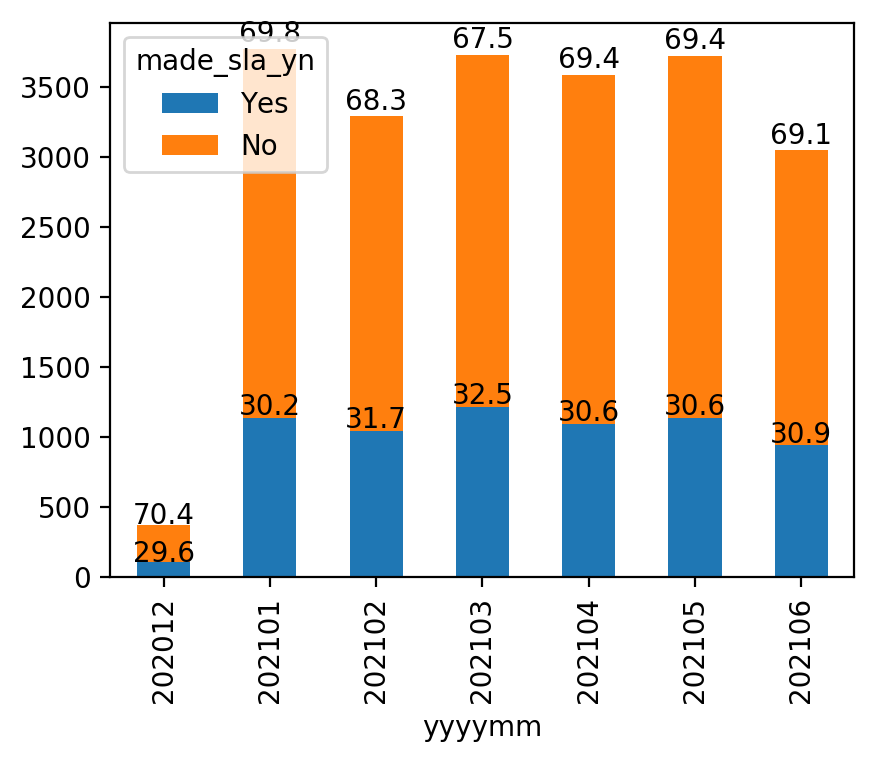

In [17]:

ax = dfg5[['Yes','No']].plot(kind='bar', stacked=True)
for j, c in enumerate(ax.containers):
    for i, p in enumerate(c.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        perc=round(height/(dfg5.iloc[i,0]+dfg5.iloc[i,1])*100,1)
        ax.annotate(perc, (x + width/2, y + height*1.02), ha='center')


(array([31., 28., 24., 35., 20., 31., 25., 19., 38., 22., 19., 22., 22.,
        28., 21., 20., 27., 16., 25., 27.]),
 array([0.00104836, 0.05091694, 0.10078552, 0.15065409, 0.20052267,
        0.25039125, 0.30025983, 0.3501284 , 0.39999698, 0.44986556,
        0.49973413, 0.54960271, 0.59947129, 0.64933986, 0.69920844,
        0.74907702, 0.7989456 , 0.84881417, 0.89868275, 0.94855133,
        0.9984199 ]),
 <a list of 20 Patch objects>)

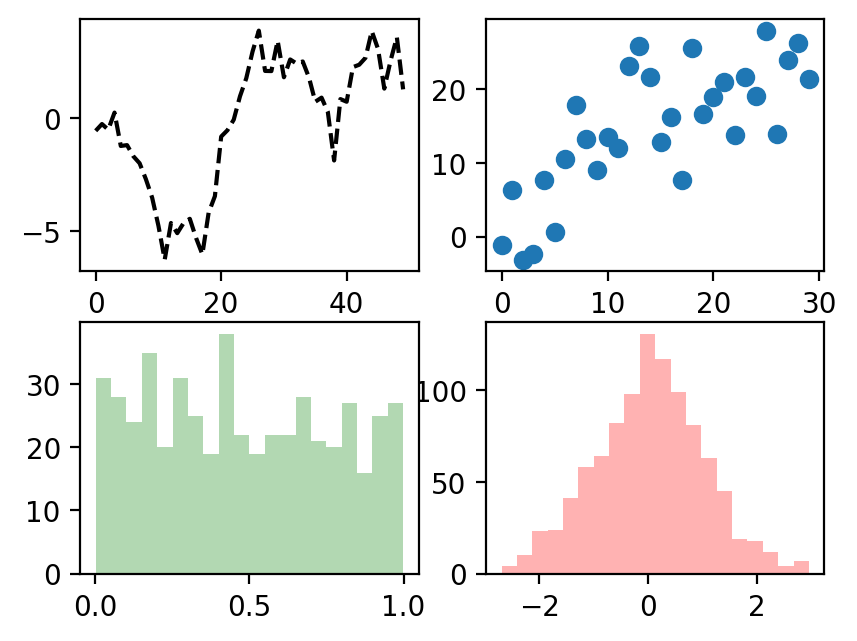

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import rand
import pandas as pd
import imp

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)
ax4 = fig.add_subplot(2,2,3)
ax1.plot(randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 6 * randn(30))
ax3.hist(randn(1000), bins=20, color='r', alpha=0.3)
ax4.hist(rand(500), bins=20, color='g', alpha=0.3)

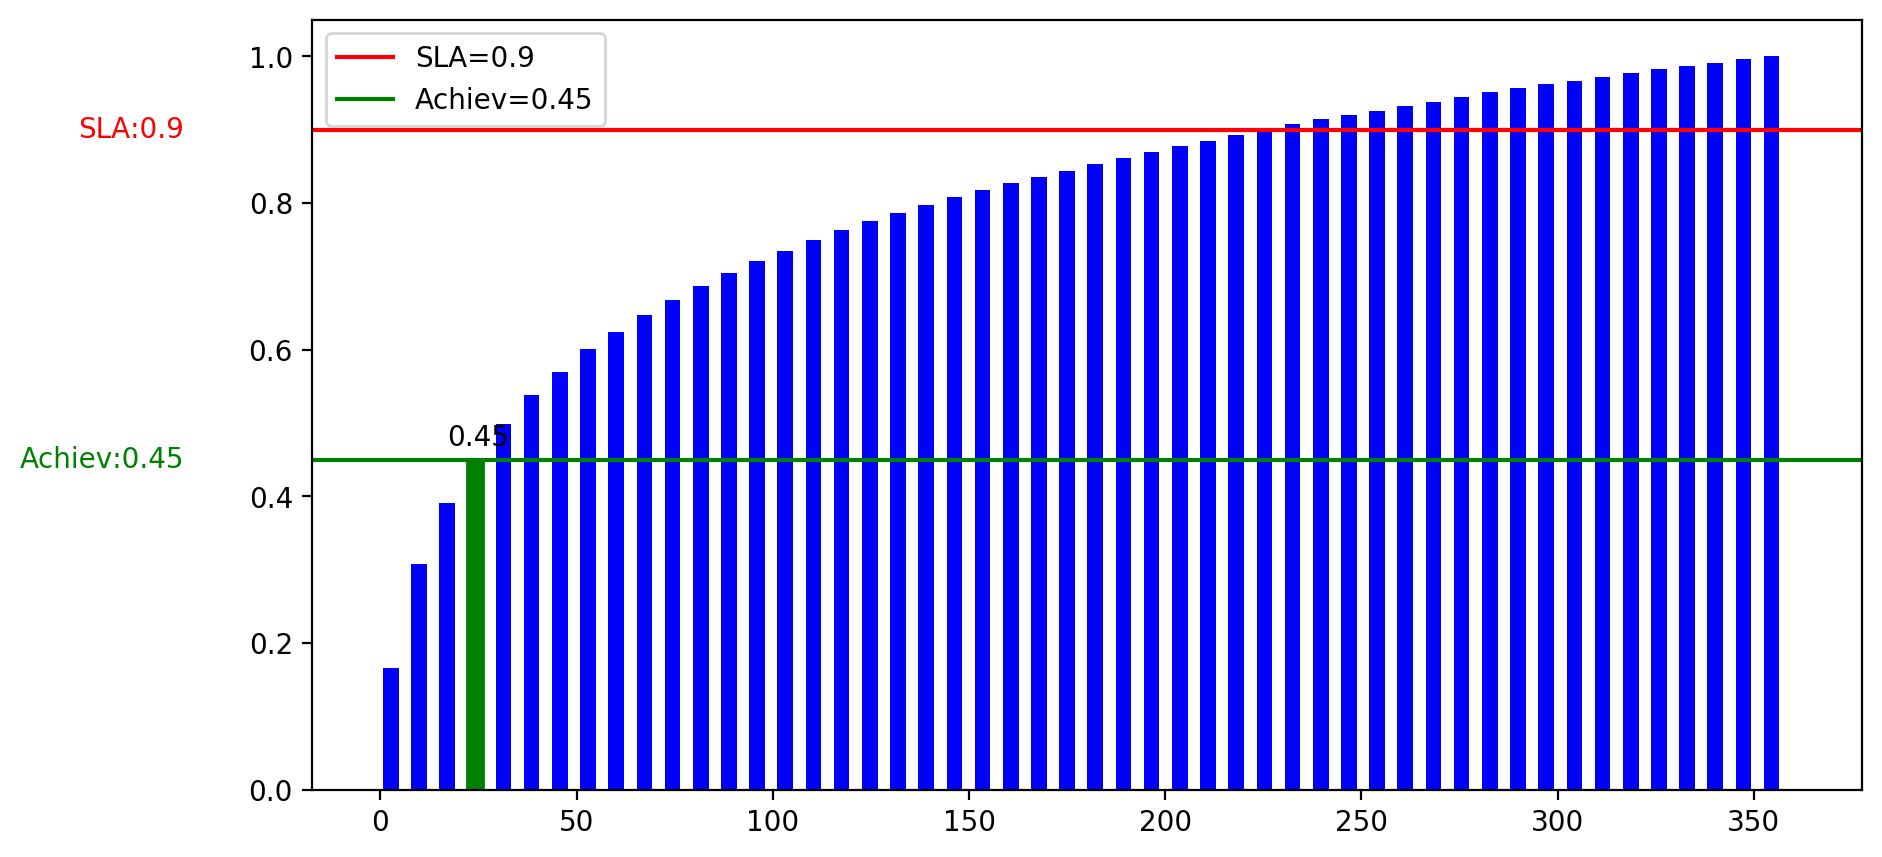

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.transforms as transforms
threshold=.9
bar_value_to_label = 24


fig, ax = plt.subplots()
fig.set_size_inches(10,5)
s = df['resolution_hs'][df.resolution_hs<= 24*15]
counts, bins, bars= ax.hist(s, density=True,cumulative=True ,bins=50, color='b', width=4)

min_distance = float("inf")  # initialize min_distance with infinity
index_of_bar_to_label = 0
for i, rectangle in enumerate(ax.patches):  # iterate over every bar  
    # tmp = distance from middle of the bar to bar_value_to_label
    tmp = abs((rectangle.get_x() + (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
    if tmp < min_distance: 
        # we are searching for the bar with x cordinate
        # closest to bar_value_to_label
        min_distance = tmp
        index_of_bar_to_label = i
ax.patches[index_of_bar_to_label].set_color('green')

rect=ax.patches[index_of_bar_to_label]
y_value = round(rect.get_height(),2)
x_value = rect.get_x() + rect.get_width() / 2
label= round(y_value,2)
ax.annotate(label,(x_value,y_value),xytext=(-10,5),  textcoords="offset points"  )

ax.axhline(y=threshold, color='r', linestyle='-', label="SLA="+str(threshold))
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(-.07,threshold,"SLA:"+str(threshold), color="red", transform=trans, 
        ha="right", va="center")
ax.axhline(y=y_value, color='green', linestyle='-', label="Achiev="+str(y_value))
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(-.07,y_value,"Achiev:"+str(y_value), color="green", transform=trans, 
        ha="right", va="center")


plt.legend()
plt.show()     